---

# Actividad Modulo 2
### Segunda entrega
Yose Miguel Sotomayor Carneado A0150908

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import fetch_kddcup99
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

---

In [3]:
data = fetch_kddcup99(as_frame=True)

X = data.data
y = data.target.astype(str)

In [4]:
encoder = LabelEncoder()

y = encoder.fit_transform(y)
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

In [60]:
pd.DataFrame(y).value_counts()

0 
18    280790
9     107201
11     97278
0       2203
17      1589
5       1247
15      1040
21      1020
20       979
14       264
10       231
3         53
1         30
6         21
22        20
4         12
16        10
7          9
2          8
8          7
13         4
12         3
19         2
Name: count, dtype: int64

In [5]:
X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,b'tcp',b'http',b'SF',310,1881,0,0,0,0,...,86,255,1.0,0.0,0.01,0.05,0.0,0.01,0.0,0.0
494017,0,b'tcp',b'http',b'SF',282,2286,0,0,0,0,...,6,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0
494018,0,b'tcp',b'http',b'SF',203,1200,0,0,0,0,...,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0
494019,0,b'tcp',b'http',b'SF',291,1200,0,0,0,0,...,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   duration                     494021 non-null  object
 1   protocol_type                494021 non-null  object
 2   service                      494021 non-null  object
 3   flag                         494021 non-null  object
 4   src_bytes                    494021 non-null  object
 5   dst_bytes                    494021 non-null  object
 6   land                         494021 non-null  object
 7   wrong_fragment               494021 non-null  object
 8   urgent                       494021 non-null  object
 9   hot                          494021 non-null  object
 10  num_failed_logins            494021 non-null  object
 11  logged_in                    494021 non-null  object
 12  num_compromised              494021 non-null  object
 13  root_shell    

In [11]:
X.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [19]:
# MAKE NUM CATEGORICAL and astype float

X['protocol_type'] = encoder.fit_transform(X['protocol_type'])
X['service'] = encoder.fit_transform(X['service'])
X['flag'] = encoder.fit_transform(X['flag'])

def make_float(x):
    return float(x)

for col in X.columns:
    X[col] = X[col].apply(make_float)

X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,1.0,22.0,9.0,181.0,5450.0,0.0,0.0,0.0,0.0,...,9.0,9.0,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0
1,0.0,1.0,22.0,9.0,239.0,486.0,0.0,0.0,0.0,0.0,...,19.0,19.0,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0
2,0.0,1.0,22.0,9.0,235.0,1337.0,0.0,0.0,0.0,0.0,...,29.0,29.0,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
3,0.0,1.0,22.0,9.0,219.0,1337.0,0.0,0.0,0.0,0.0,...,39.0,39.0,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
4,0.0,1.0,22.0,9.0,217.0,2032.0,0.0,0.0,0.0,0.0,...,49.0,49.0,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0.0,1.0,22.0,9.0,310.0,1881.0,0.0,0.0,0.0,0.0,...,86.0,255.0,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0
494017,0.0,1.0,22.0,9.0,282.0,2286.0,0.0,0.0,0.0,0.0,...,6.0,255.0,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0
494018,0.0,1.0,22.0,9.0,203.0,1200.0,0.0,0.0,0.0,0.0,...,16.0,255.0,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0
494019,0.0,1.0,22.0,9.0,291.0,1200.0,0.0,0.0,0.0,0.0,...,26.0,255.0,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0


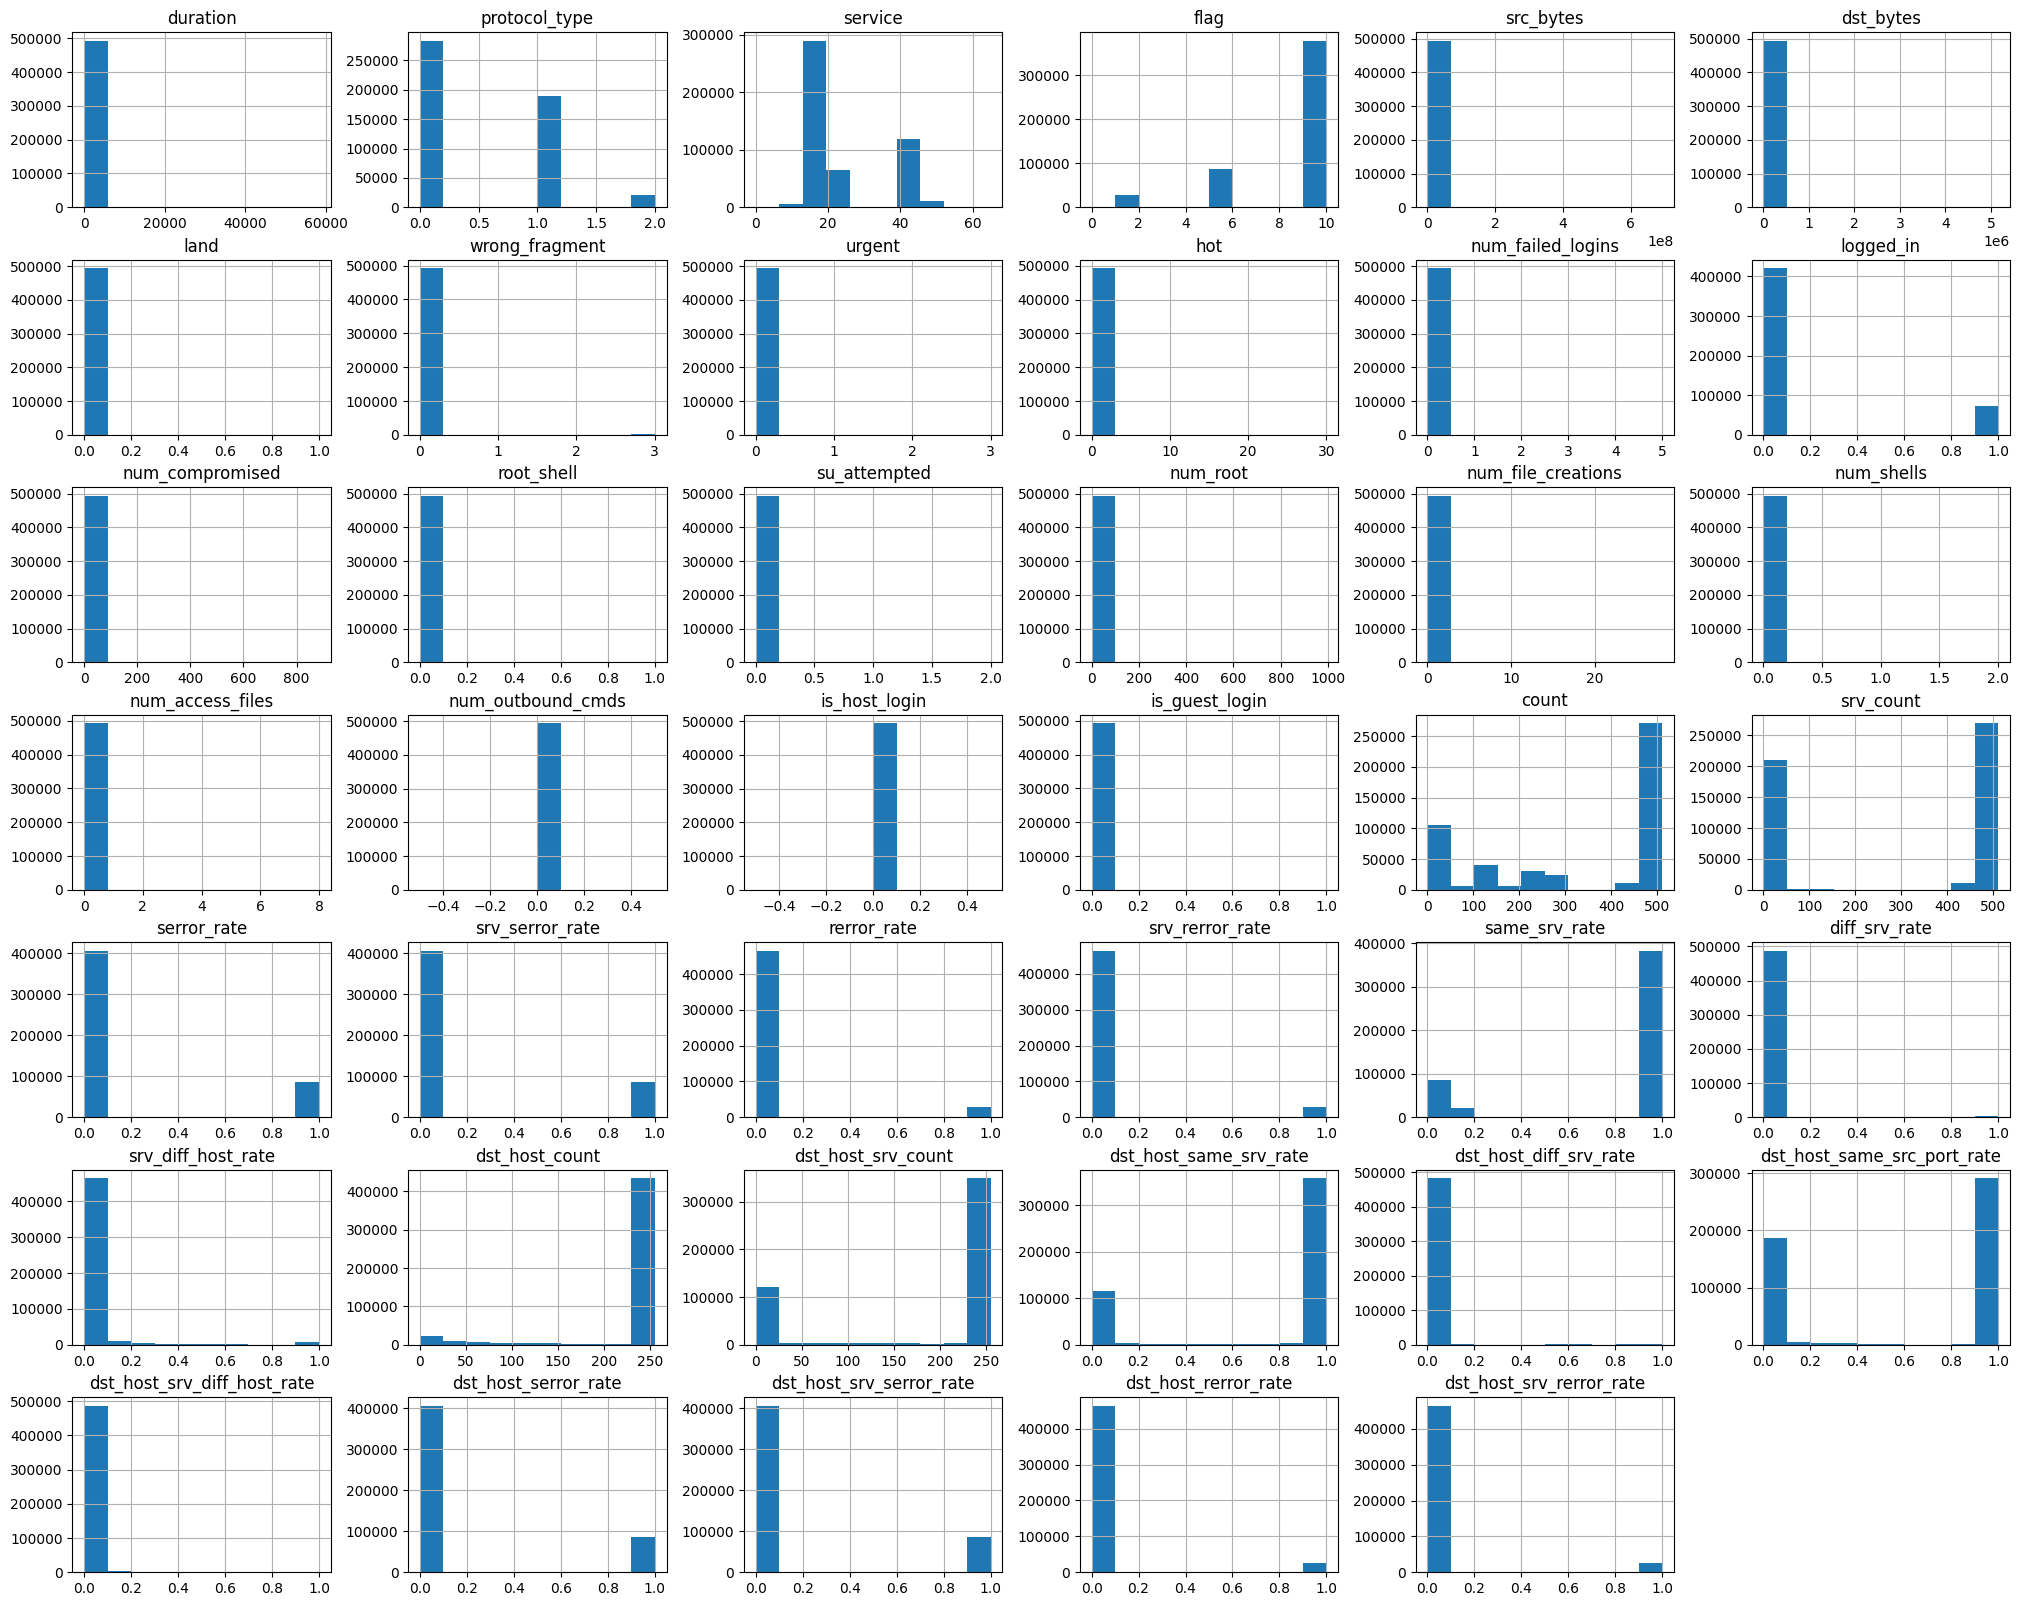

In [27]:
X.hist(figsize=(25, 20))
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---

Como es un problema de clasificacion multiclase vamos a usar onehotencoder para las clases de la y

In [54]:
# Columnas categóricas
cat_cols = ['protocol_type', 'service', 'flag']

# Columnas numéricas
num_cols = [c for c in X.columns if c not in cat_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols)
    ]
)

transformer = Pipeline(
        steps=[
            ("power", PowerTransformer(method="yeo-johnson", standardize=True)),
        ]
    )

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('transform', transformer),
    ('classifier', LogisticRegression(max_iter=1000, penalty='l2', multi_class='auto' ))
])

clf.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('transform', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [55]:
y_pred = clf.predict(X_test)

In [56]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       435
           1       0.89      1.00      0.94         8
           2       1.00      1.00      1.00         1
           3       0.88      1.00      0.93         7
           4       0.67      1.00      0.80         2
           5       0.92      0.81      0.86       300
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         0
           8       1.00      0.33      0.50         3
           9       1.00      1.00      1.00     21318
          10       0.38      0.89      0.53        19
          11       1.00      1.00      1.00     19373
          12       1.00      1.00      1.00         1
          14       0.97      1.00      0.99        37
          15       0.94      1.00      0.97       223
          17       0.90      0.98      0.94       278
          18       1.00      1.00      1.00     56395
          20       1.00    

Podemos observar que los resultados son bastante buenos.

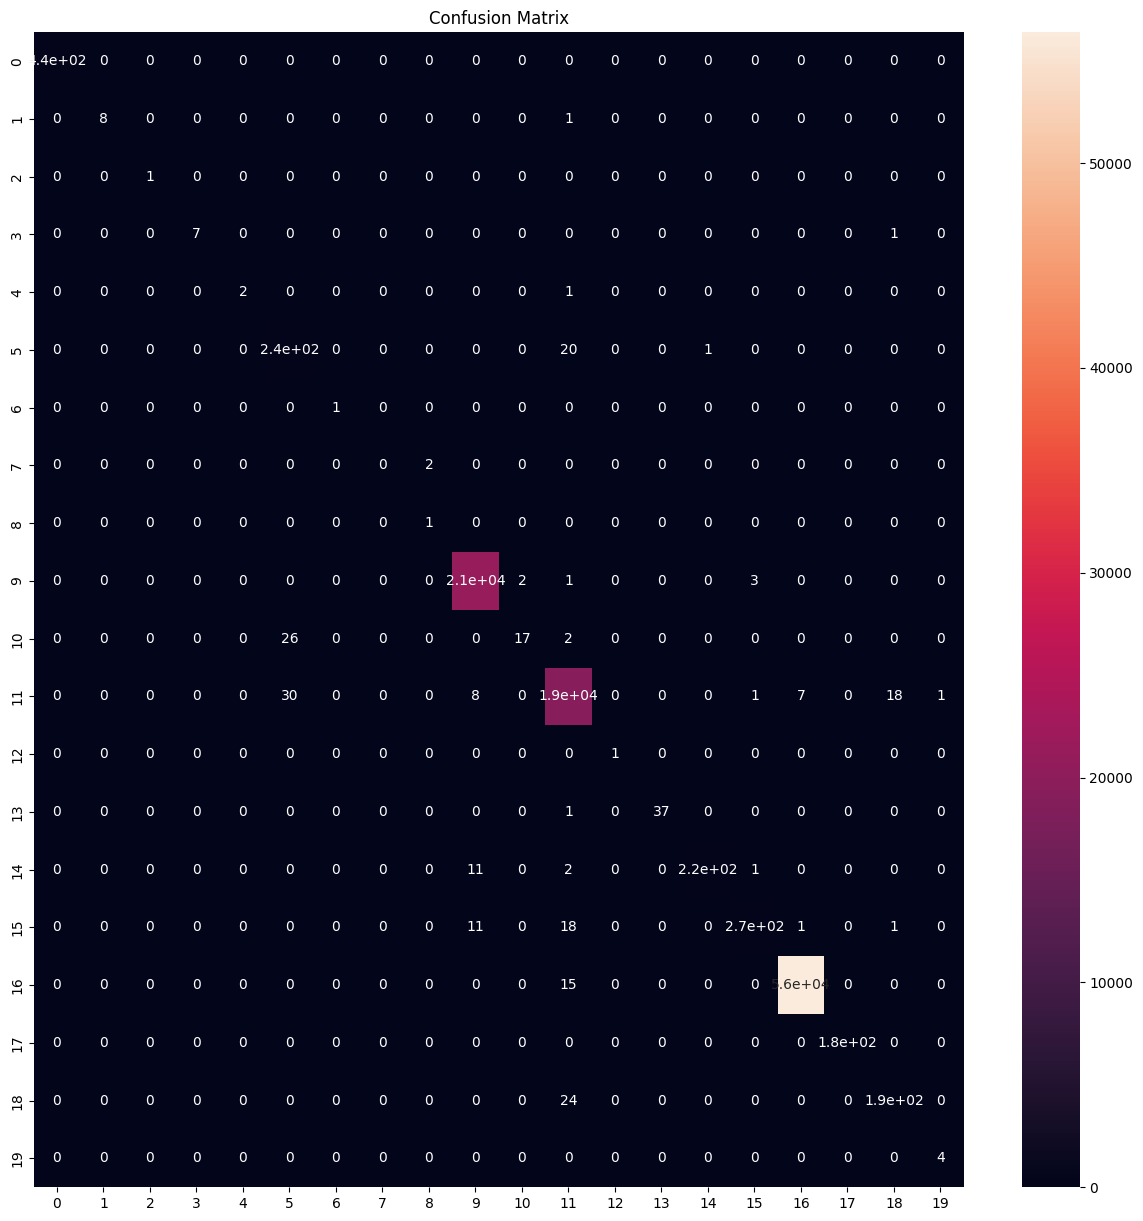

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(15, 15))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix")
plt.show()

In [58]:
from sklearn.metrics import f1_score
print('F1 Macro' ,f1_score(y_test, y_pred, average='macro'))
print('F1 Micro' ,f1_score(y_test, y_pred, average='micro'))
print('F1 Weighted' ,f1_score(y_test, y_pred, average='weighted'))


F1 Macro 0.8621861403907598
F1 Micro 0.997874601487779
F1 Weighted 0.9978189895431658


Vemos que el modelo a grandes rasgos tiene unos buenos f1-score para evaluar el modelo con muchas clases y MUY mal balanceadas!